# <center>CUSTOMER CHUN.</center>

### OBJECTIF: 
       Construire un model de machine learning pour predire le desabonnement des clients d'une entreprise

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

## ANALYSE UNIVARIÉ

In [5]:
# variable categorielle

colonne_cat = df.columns[df.nunique() < 5].to_list()
colonne_cat

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [6]:
def barplot(a):
    sns.countplot(y = df[a], palette = "cool")
    plt.ylabel("proportion")
    plt.title("Distribution de "+ str(a))
    return plt.show()

In [7]:
interact(barplot, a = colonne_cat);

interactive(children=(Dropdown(description='a', options=('gender', 'SeniorCitizen', 'Partner', 'Dependents', '…

### conclusion : probleme de desequilibre de classe notamment sur la variable churn

In [8]:
# colonnes numeriques

df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan).astype(float)

In [9]:
colonne_num = df.columns[df.nunique() > 5].to_list()[1:]
colonne_num

['tenure', 'MonthlyCharges', 'TotalCharges']

In [10]:
def histplot(b):
    sns.distplot(df[b])
    # coefficient d'asymetrie
    plt.title("histogramme de : " + str(b)+" / skew = "+ str(df[b].skew()))
    return plt.show()

In [11]:
interact(histplot, b = colonne_num);

interactive(children=(Dropdown(description='b', options=('tenure', 'MonthlyCharges', 'TotalCharges'), value='t…

### conclusion: le coefficient d'assymetrie de la variable "totalcharges" est tres eleve

In [12]:
# verification des outliers

def boxplot(c):
    sns.boxplot(y = df[c])
    plt.title("boxplot de "+ str(c))
    return plt.show()

In [13]:
interact(boxplot, c = colonne_num);

interactive(children=(Dropdown(description='c', options=('tenure', 'MonthlyCharges', 'TotalCharges'), value='t…

## ANALYSE BIVARIE

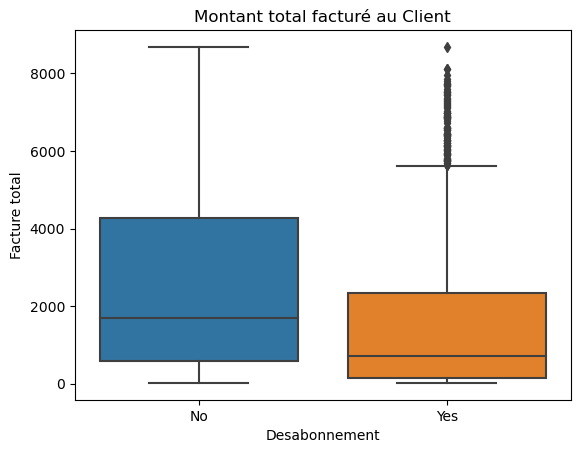

In [14]:
# totalcharges vs churn

sns.boxplot(x = "Churn", y = "TotalCharges", data = df)
plt.xlabel("Desabonnement")
plt.ylabel("Facture total")
plt.title("Montant total facturé au Client")
plt.show()

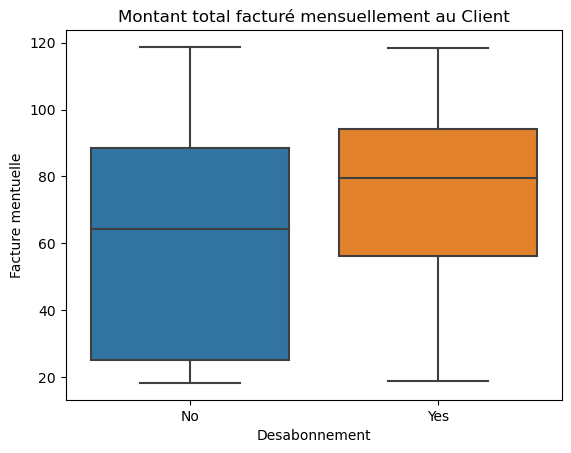

In [15]:
# monthlycharges vs churn

sns.boxplot(x = "Churn", y = "MonthlyCharges", data = df)
plt.xlabel("Desabonnement")
plt.ylabel("Facture mentuelle")
plt.title("Montant total facturé mensuellement au Client")
plt.show()

### conclusion : cette entreprise a plus facturé les clients actuellement desabonnés avant leur desabonnement que les clients abonnés

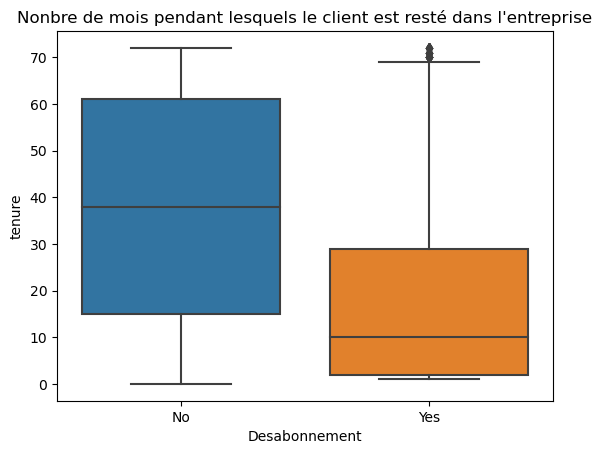

In [16]:
# tenure vs churn

sns.boxplot(x = "Churn", y = "tenure", data = df)
plt.xlabel("Desabonnement")
plt.title("Nonbre de mois pendant lesquels le client est resté dans l'entreprise")
plt.show()

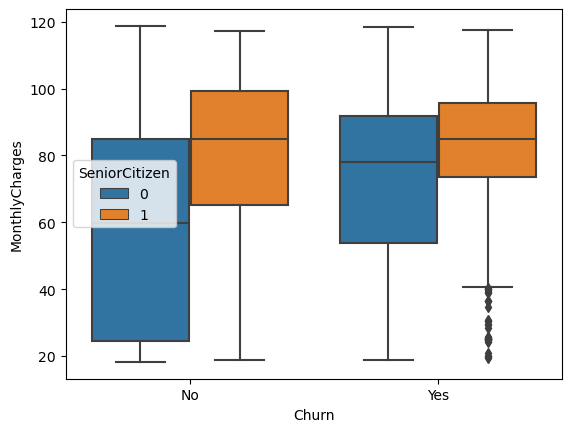

In [17]:
# monthlycharges vs churn by seniorcitizen

sns.boxplot(x = "Churn", y = "MonthlyCharges", data = df, hue = "SeniorCitizen");

### conclusion : il semble que les personnes agees soient beaucoup plus facturées mensuellement que les jeunes. mais ils restent plus fidèles a l'entreprise que les jeunes

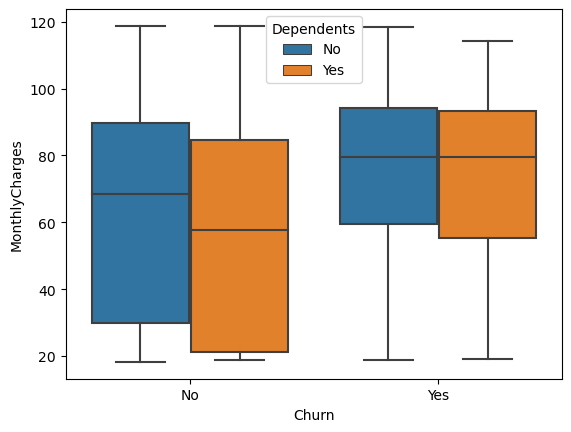

In [18]:
# monthlycharges vs churn by dependents

sns.boxplot(x = "Churn", y = "MonthlyCharges", data = df, hue = "Dependents");

In [19]:
# resume statistique

df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


## PRÉTRAITEMENT DE DONNEES

In [20]:
data = df.copy()

In [21]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [22]:
# suppression des valeurs manquantes

data = data.dropna()
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
# encodage des variables binaires

data["gender"] = data["gender"].apply(lambda x: 1 if x == "Female" else 0)
data["gender"]

0       1
1       0
2       0
3       0
4       1
       ..
7038    0
7039    1
7040    1
7041    0
7042    0
Name: gender, Length: 7032, dtype: int64

In [24]:
# encodage de variables catgorielles

colonne_cat2 = df.columns[df.nunique() < 3].to_list()[1:]
colonne_cat2

['SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [25]:
for col in colonne_cat2:
    data[col] = data[col].apply(lambda x: 1 if x == "Yes" else 0)

In [26]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,24,1,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,1,0,1,1,72,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,1,0,1,1,11,0,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,0,0,1,0,4,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [27]:
colonne_cat3 = data[colonne_cat].columns[data[colonne_cat].nunique() > 2].to_list()
colonne_cat3

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [28]:
dummy = pd.get_dummies(data[colonne_cat3], dtype = int, drop_first = True)
dummy

,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,0,0,1,0,0,0,1,...,1,0,1,0,1,1,0,0,0,1
7039,0,1,1,0,0,0,0,1,0,1,...,0,0,1,0,1,1,0,1,0,0
7040,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7041,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
# nouveau dataframe

data = pd.concat([data["gender"], data[colonne_cat2], data[colonne_num], dummy], axis = 1)

In [30]:
data.shape

(7032, 31)

### Ammelioration de l'asymetrie de la colonne totalcharges

In [31]:
# transformatio de la colonne totalcharge
 
data["TotalCharges"] = np.sqrt(data["TotalCharges"])


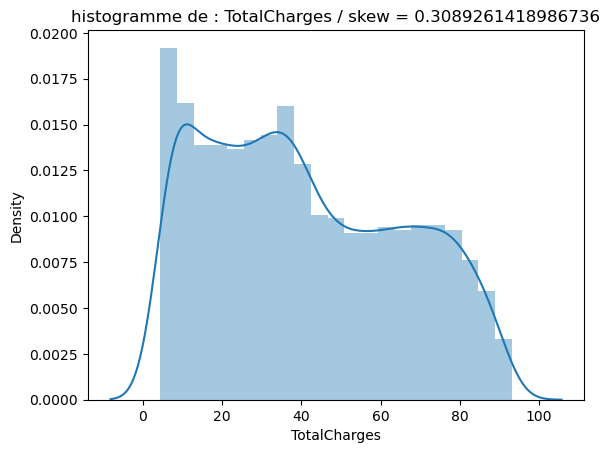

In [32]:
sns.distplot(data["TotalCharges"])
    # coefficient d'asymetrie
plt.title("histogramme de : TotalCharges"+" / skew = "+ str(data["TotalCharges"].skew()))
plt.show()

### decoupage du dataset

In [33]:
x = data.drop("Churn", axis = 1)
y = data["Churn"]
seed = 1111

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.4, random_state = seed, stratify = y)

x_val, x_test, y_val, y_test = train_test_split(x_test,y_test, test_size = 0.5, random_state = seed, stratify = y_test)

### Virifions que les proportions de personnes ayant résilié ou non leur contrat soient les meme dans les differents ensembles de donnees

In [34]:
# frequence des classes dans y

pd.DataFrame(y).value_counts(normalize = True)

Churn
0        0.734215
1        0.265785
Name: proportion, dtype: float64

In [35]:
# frequence des classes dans y_train

pd.DataFrame(y_train).value_counts(normalize = True)

Churn
0        0.734297
1        0.265703
Name: proportion, dtype: float64

In [36]:
# frequence des classes dans y_val

pd.DataFrame(y_val).value_counts(normalize = True)

Churn
0        0.733997
1        0.266003
Name: proportion, dtype: float64

In [37]:
# frequence des classes dans y_test

pd.DataFrame(y_test).value_counts(normalize = True)

Churn
0        0.734186
1        0.265814
Name: proportion, dtype: float64

### Resolvons le probleme de desequilibre de classes
       pour eviter des erreurs de modelisation

In [38]:
df["Churn"].value_counts(normalize = True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

### Nous pouvons remarquer que notre jeu de donnees 27% de YES contre 73% de NO

In [39]:
#sur-echantillonnage

x2 = x_train
x2['Churn'] = y_train

minority = x2[x2.Churn == 1]
majority = x2[x2.Churn == 0]

min_upsamp = resample(minority, replace=True , n_samples = len(majority), random_state=seed)
upsample = pd.concat([majority, min_upsamp])

upsample

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,tenure,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
6406,1,0,0,0,0,1,39,50.65,43.650888,1,...,0,1,0,1,0,0,1,0,0,0
6124,1,0,1,1,1,1,57,59.30,57.221936,0,...,0,0,0,0,1,0,0,0,1,0
4051,1,0,1,0,1,1,72,97.70,82.883653,0,...,0,1,0,1,0,1,1,0,0,0
3839,1,0,1,1,1,0,15,20.05,16.861198,0,...,1,0,1,0,0,0,0,0,1,0
2523,1,0,1,1,1,0,47,20.25,29.553342,0,...,1,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5872,1,0,0,1,1,1,1,69.65,8.345658,0,...,0,0,0,0,0,0,0,1,0,1
6040,1,0,0,0,1,0,1,70.75,8.411302,0,...,0,0,0,0,0,0,0,0,1,1
4212,1,0,0,0,1,0,1,90.60,9.518403,0,...,0,1,0,1,0,0,0,1,0,1
508,1,0,1,1,1,1,6,80.50,22.424317,0,...,0,0,0,0,0,0,0,1,0,1


In [40]:
# verification

upsample.Churn.value_counts(normalize = True)

Churn
0    0.5
1    0.5
Name: proportion, dtype: float64

In [41]:
# donnees d'entrainnement sur la base du sur-echantillonnage

x_train_up = upsample.drop("Churn", axis = 1)
y_train_up = upsample.Churn

In [42]:
# sous-echantillonnage

max_upsamp = resample(majority, replace=False , n_samples = len(minority), random_state=seed)
downsample = pd.concat([minority, max_upsamp])

downsample

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,tenure,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
6908,0,0,0,1,1,0,9,55.35,21.207310,0,...,0,1,0,0,0,0,0,1,0,1
1530,0,0,1,1,1,0,2,90.00,13.785862,0,...,0,0,0,1,0,0,1,0,0,1
3617,1,0,1,0,0,1,18,48.35,28.472794,1,...,0,1,0,1,0,0,0,1,0,1
6800,1,0,1,0,1,0,14,105.95,36.727374,0,...,0,1,0,1,1,0,0,0,1,1
3772,0,0,1,0,1,1,1,95.00,9.746794,0,...,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,1,0,1,0,1,0,71,109.25,87.793508,0,...,0,1,0,1,0,1,0,1,0,0
3663,1,0,0,0,1,1,9,88.40,28.082023,0,...,0,1,0,1,0,0,0,0,1,0
5033,1,0,0,0,1,1,1,19.40,4.404543,0,...,1,0,1,0,0,0,0,0,1,0
2183,0,0,0,0,1,1,2,50.20,10.452272,0,...,0,0,0,0,0,0,1,0,0,0


In [43]:
# verification

downsample.Churn.value_counts(normalize = True)

Churn
1    0.5
0    0.5
Name: proportion, dtype: float64

In [44]:
# donnees d'entrainnement sur la base du sous-echantillonnage

x_train_down = downsample.drop("Churn", axis = 1)
y_train_down = downsample.Churn

In [45]:
# x_train et y_train

y_train = x_train["Churn"]
x_train = x_train.drop("Churn", axis = 1)

## choix des donnees d'entrainnement

In [46]:
# donnees d'entrainement 
# choix possible (x_train , y_train), (x_train_up , y_train_up) et (x_train_down , y_train_down)

train_features = x_train_up

train_label = y_train_up

### NORMALISATION DES DONNEES
    elle permet d'eviter la creation de biais dans le resultat de notre model. elle permet d'obtenir des variables entre 0 et 1 contrairement a la standardisation qui permet d'obtenir z score de chucune des valeurs presente.

In [47]:
scaler = MinMaxScaler()
mod_scaler = scaler.fit(train_features)
train_features = pd.DataFrame(mod_scaler.transform(train_features), columns = x.columns)
x_val =  pd.DataFrame(mod_scaler.transform(x_val), columns = x.columns)
x_test = pd.DataFrame(mod_scaler.transform(x_test), columns = x.columns)

train_features

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,tenure,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,0.0,0.0,0.0,1.0,0.535211,0.322388,0.442455,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,1.0,1.0,1.0,0.788732,0.408458,0.595186,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,1.0,1.0,1.000000,0.790547,0.883986,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,1.0,1.0,1.0,0.0,0.197183,0.017910,0.140961,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,1.0,1.0,0.0,0.647887,0.019900,0.283800,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6191,1.0,0.0,0.0,1.0,1.0,1.0,0.000000,0.511443,0.045126,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6192,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.522388,0.045865,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6193,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.719900,0.058325,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6194,1.0,0.0,1.0,1.0,1.0,1.0,0.070423,0.619403,0.203569,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Selection des meilleures variables predictrice

In [48]:
rf = RandomForestClassifier()
rf.fit(train_features, train_label)
print(classification_report(y_val, rf.predict(x_val)))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1032
           1       0.57      0.53      0.55       374

    accuracy                           0.77      1406
   macro avg       0.70      0.69      0.70      1406
weighted avg       0.76      0.77      0.77      1406



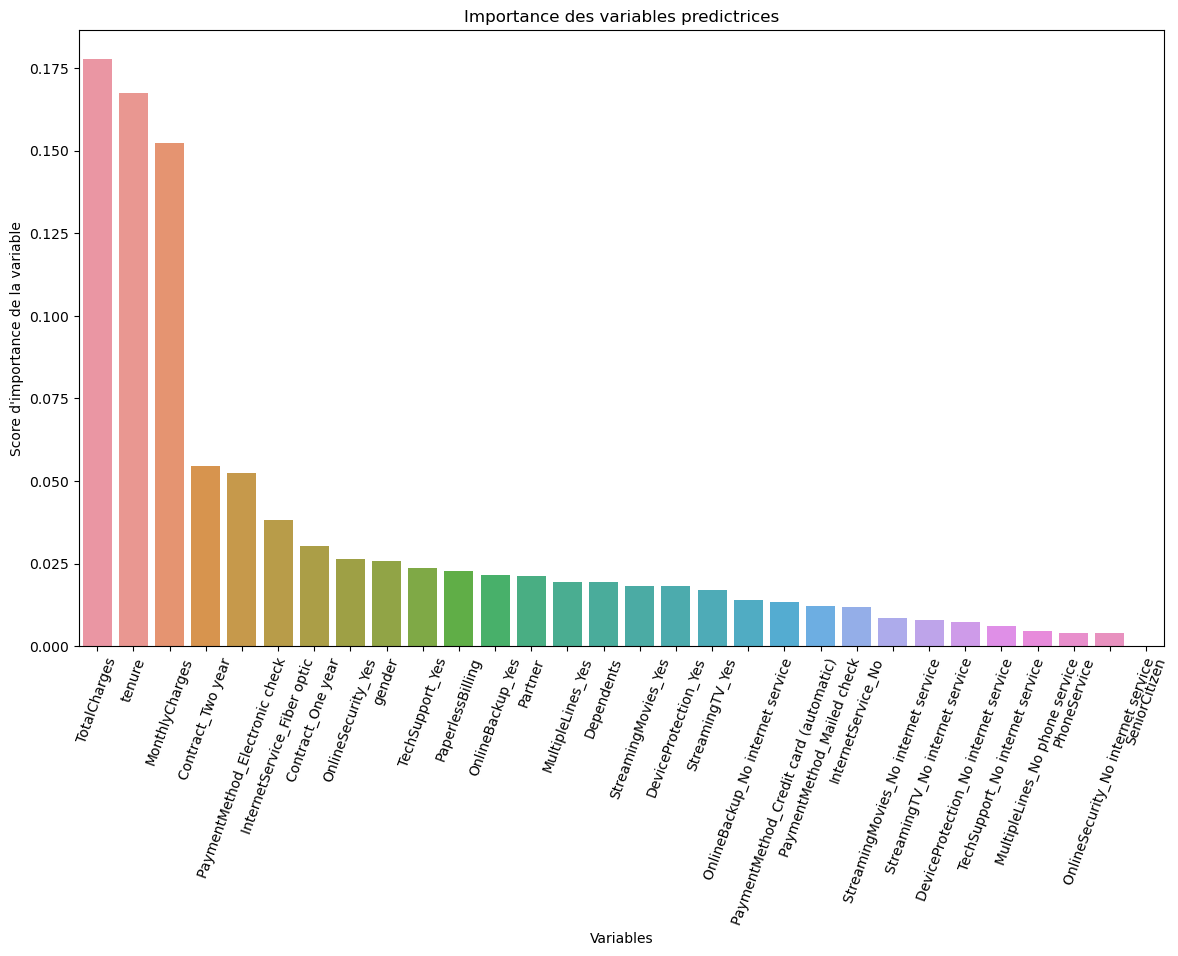

In [49]:
# variable independante importante

vars_imp = pd.Series(rf.feature_importances_, index = train_features.columns).sort_values(ascending = False)

plt.figure(figsize = (14,8))
plt.xticks(rotation = 70)
sns.barplot(x = vars_imp.index, y = vars_imp)
plt.xlabel("Variables")
plt.ylabel("Score d'importance de la variable")
plt.title("Importance des variables predictrices");

In [50]:
vars_imp

TotalCharges                             0.177639
tenure                                   0.167405
MonthlyCharges                           0.152265
Contract_Two year                        0.054602
PaymentMethod_Electronic check           0.052527
InternetService_Fiber optic              0.038315
Contract_One year                        0.030435
OnlineSecurity_Yes                       0.026261
gender                                   0.025680
TechSupport_Yes                          0.023758
PaperlessBilling                         0.022747
OnlineBackup_Yes                         0.021422
Partner                                  0.021171
MultipleLines_Yes                        0.019330
Dependents                               0.019312
StreamingMovies_Yes                      0.018183
DeviceProtection_Yes                     0.018063
StreamingTV_Yes                          0.017069
OnlineBackup_No internet service         0.014085
PaymentMethod_Credit card (automatic)    0.013466


In [51]:
# variables selectionnées

seuil = 0.004
vars_selected = vars_imp[vars_imp > seuil].index.to_list()
train_features = train_features[vars_selected]
x_val = x_val[vars_selected]
x_test = x_test[vars_selected]

In [52]:
# nombre de variables predictrices

len(train_features.columns)

28

## MODELISATION
    l'objectif est de construire un model de classification qui predit si un model doit se desabonner ou non.

### Modele de Regression logistique

In [53]:
# dictionnair de parametres

param_grid = {"C": [0.001, 0.01, 1, 10, 50, 100, 500]}

In [54]:
# objet Gridsearch

grid_log = GridSearchCV(estimator = LogisticRegression(random_state = seed, max_iter = 500), 
                        param_grid = param_grid,
                       scoring = "f1",
                       cv = 5)

In [55]:
# entrainement de l'algorithme

model_log = grid_log.fit(train_features, train_label)

In [56]:
# meilleur score et meilleur hyperparametre
print(round(model_log.best_score_, 3))

0.788


In [57]:
print(model_log.best_estimator_)

LogisticRegression(C=10, max_iter=500, random_state=1111)


In [58]:
# fonction d'evaluation

def model_evaluation(model, features, label):
    pred = model.predict(features)
    print(classification_report(label, pred))

In [59]:
# evaluation du model de regression logistique

model_evaluation(model_log, x_val, y_val)

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1032
           1       0.51      0.74      0.60       374

    accuracy                           0.74      1406
   macro avg       0.70      0.74      0.71      1406
weighted avg       0.79      0.74      0.75      1406



## RFE

Recursive Feature Eliminator est un algorithme de selection de variables permettant de voir si un model garde les meme performance si son nombre de predicteur est reduit, car plus un model est complexe plus il est difficile a interpreter.

In [60]:
def model_rfe(model):
    rfe_model = RFE(estimator = model, verbose = 0)
    rfe_model.fit(train_features, train_label)
    mask = rfe_model.support_
    reducer_x = train_features.loc[:,mask]
    print(reducer_x.columns)
    return rfe_model

In [61]:
# logistique regression rfe

rfe_log = model_rfe(model_log.best_estimator_)

rfe_log

Index(['TotalCharges', 'MonthlyCharges', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'Contract_One year', 'PaperlessBilling', 'MultipleLines_Yes',
       'StreamingMovies_Yes', 'StreamingTV_Yes',
       'OnlineBackup_No internet service', 'InternetService_No',
       'DeviceProtection_No internet service',
       'TechSupport_No internet service'],
      dtype='object')


RFE(estimator=LogisticRegression(C=10, max_iter=500, random_state=1111))

In [62]:
# evaluation du model de regression logistique avec rfe

model_evaluation(rfe_log, x_val, y_val)

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1032
           1       0.51      0.74      0.60       374

    accuracy                           0.74      1406
   macro avg       0.70      0.74      0.70      1406
weighted avg       0.79      0.74      0.75      1406



### la RFE a reduit le nombre de variables de 28 a 14 et n'a pas ammeliorer les performances du model

### Modele de Foret Aleatoire

In [63]:
# dictionnair de parametres

param_grid_rf = {"n_estimators" : [10, 50, 100, 500, 1000],
                "max_depth" : [3,5,10,20,None]}

In [64]:
# objet Gridsearch

grid_rf = GridSearchCV(estimator = RandomForestClassifier(random_state = seed), 
                       param_grid = param_grid_rf,
                       scoring = "f1",
                       cv=5)

In [65]:
# entrainement de l'algorithme

model_rf = grid_rf.fit(train_features, train_label)

In [76]:
# meilleur score et meilleur hyperparametre
print(round(model_rf.best_score_, 3))

0.907


In [77]:
print(model_rf.best_estimator_)

RandomForestClassifier(max_depth=20, n_estimators=50, random_state=1111)


In [78]:
# evaluation du model de randon forest

model_evaluation(model_rf, x_val, y_val)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1032
           1       0.57      0.52      0.54       374

    accuracy                           0.77      1406
   macro avg       0.70      0.69      0.69      1406
weighted avg       0.76      0.77      0.76      1406



## RFE

In [69]:
rfe_rf = model_rfe(model_rf.best_estimator_)
rfe_rf

Index(['TotalCharges', 'tenure', 'MonthlyCharges', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'Contract_One year', 'OnlineSecurity_Yes', 'gender', 'TechSupport_Yes',
       'PaperlessBilling', 'OnlineBackup_Yes', 'Partner', 'Dependents'],
      dtype='object')


RFE(estimator=RandomForestClassifier(max_depth=20, n_estimators=50,
                                     random_state=1111))

In [70]:
# evaluation du model avec rfe

model_evaluation(rfe_rf, x_val, y_val)

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1032
           1       0.56      0.54      0.55       374

    accuracy                           0.76      1406
   macro avg       0.70      0.69      0.69      1406
weighted avg       0.76      0.76      0.76      1406



### Classificateur Perceptron Multicouche

In [71]:
mlp = MLPClassifier(random_state = seed, max_iter = 1000)

parameters = {"hidden_layer_sizes" : [(50,), (100,), (200, ),(300,)],
      #"activation" : ["identify", "logistic","tanh", "relu"],
      "learning_rate":["constant", "invscaling", "adaptive"]}

mlp_cv = GridSearchCV(mlp, parameters, scoring = "f1", cv = 5, n_jobs = -1)

mlp_cv.fit(train_features, train_label)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000, random_state=1111),
             n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(50,), (100,), (200,), (300,)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive']},
             scoring='f1')

In [72]:
# meilleur score et meilleur hyperparametre
print(round(mlp_cv.best_score_, 3))

0.865


In [73]:
print(mlp_cv.best_estimator_)

MLPClassifier(hidden_layer_sizes=(200,), max_iter=1000, random_state=1111)


In [74]:
# evaluation du model de randon forest

model_evaluation(mlp_cv, x_val, y_val)

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1032
           1       0.52      0.57      0.55       374

    accuracy                           0.75      1406
   macro avg       0.68      0.69      0.68      1406
weighted avg       0.75      0.75      0.75      1406



### Support Vector Machine

In [79]:
svm = SVC(random_state = seed)
svm_hyp = {"kernel": ["linear", "rbf"], "C":[0.1, 1.0, 10, 50, 100]}
svm_cv = GridSearchCV(svm, svm_hyp, scoring = "f1", cv = 5)

svm_cv.fit(train_features, train_label)
print(round(svm_cv.best_score_, 3))
print(svm_cv.best_estimator_)

0.855
SVC(C=100, random_state=1111)


In [80]:
# evaluation du model de randon forest

model_evaluation(svm_cv, x_val, y_val)

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1032
           1       0.50      0.60      0.55       374

    accuracy                           0.74      1406
   macro avg       0.67      0.69      0.68      1406
weighted avg       0.75      0.74      0.74      1406



### Conclusion

performance du meilleur model sur les donnees de test.

In [81]:
# evaluation du model de randon forest

model_evaluation(model_log, x_test, y_test)

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1033
           1       0.54      0.76      0.63       374

    accuracy                           0.77      1407
   macro avg       0.72      0.77      0.73      1407
weighted avg       0.80      0.77      0.78      1407

